In [1]:
# Todo:
# Missing values - drop method, imputation, calculate weight from height and BMI
# Detail on different imputation techniques
# Outlier detection and possible elimination
# Checking dataset label balance
# Data transformation -> normalization, standardization and all techniques associated with it
# Label encoding categorical variables where required
# PCA
# LDA
# General EDA

#### UPDATE ==> ALL DONE

In [2]:
# Datasets so far
# absent_train ==> just importing the file, fixing formats, converting variable names and doing other mandatory conversions
# target or y ==> label for classification (converted)
# Use y_drop for dropped versions of datasets
# continuous_target ==> labels for regression
# X ==> unnecessary columns dropped, target dropped
# X_drop ==> outliers and NAs dropped [equivalent - y_drop]
# X_scaled ==> Original X + scaling
# X_drop_scaled ==> Original X + drop + scaling [[equivalent - y_drop]]
# X_imputed_scaled ==> Original X + outliers and NAs imputed + scaled
# ===========================================================================
# X_imputed_scaled_PCA ==> PCA on X_imputed_scaled (projected_X_imputed_scaled ==> same thing as ndarray)
# X_drop_scaled_PCA ==> PCA on X_drop_scaled (projected_X_drop_scaled ==> same thing as ndarray)
# =================================================================================
# X_imputed_scaled_correl ==> drop correlated variables
# X_drop_scaled_correl ==> drop correlated variables
# ==================================================================================
# X_imputed_scaled_LDA ==> LDA on X_imputed_scaled
# X_drop_scaled_LDA ==> LDA on X_drop_scaled

In [3]:
# Test datasets

# (Unlike train, y_test will be used for dropped datasets as well. No y_drop. We don't drop test data)
# If a test dataset has the name 'drop' in it, it means it was fit on the train version of the drop dataset for scaling, pca etc

# absent_test
# target_test or y_test
# continuous_target_test
# X_test
# NOTE: No X_test_drop
# X_test_scaled
# X_test_drop_scaled
# X_test_imputed_scaled
# ================================================================================
# X_test_imputed_scaled_PCA
# X_test_drop_scaled_PCA
# ================================================================================
# X_test_imputed_scaled_correl
# X_test_drop_scaled_correl
# ==================================================================================
# X_test_imputed_scaled_LDA
# X_test_drop_scaled_LDA

In [4]:
import pandas as pd
# import the csv file 
input_file = "C:/Users/anchi/Notebooks/Project/Absenteeism_at_work_train.csv"
absent_train = pd.read_csv(input_file)

In [5]:
import pandas as pd
# import the csv file 
input_file = "C:/Users/anchi/Notebooks/Project/Absenteeism_at_work_test.csv"
absent_test = pd.read_csv(input_file)

In [6]:
absent_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,2


In [7]:
absent_test.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
1,28,19,4,2,3,225,26,9,28,"246,288",...,0,1,1,0,0,2,69,169,24,8
2,25,16,4,3,3,235,16,8,32,"246,288",...,0,3,0,0,0,0,75,178,25,3
3,22,27,4,6,3,179,26,9,30,"246,288",...,0,3,0,0,0,0,56,171,19,2
4,14,28,4,3,3,155,12,14,34,"246,288",...,0,1,2,1,0,0,95,196,25,4


In [8]:
absent_train.shape

(666, 21)

In [9]:
absent_test.shape

(74, 21)

In [10]:
absent_train.describe()
# TODO: check out workload avg, age

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [11]:
absent_train.info()
# Age, Workload avg need to be converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason for absence               666 non-null    int64  
 2   Month of absence                 666 non-null    int64  
 3   Day of the week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation expense           666 non-null    int64  
 6   Distance from Residence to Work  666 non-null    int64  
 7   Service time                     666 non-null    int64  
 8   Age                              666 non-null    object 
 9   Work load Average/day            666 non-null    object 
 10  Hit target                       665 non-null    float64
 11  Disciplinary failure             666 non-null    int64  
 12  Education             

In [12]:
# relabelling columns for easy access
absent_train.columns = absent_train.columns.str.replace(' ', '_')
absent_train.columns = absent_train.columns.str.rstrip('_')
print(absent_train.columns)

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


In [13]:
# relabelling columns for easy access
absent_test.columns = absent_test.columns.str.replace(' ', '_')
absent_test.columns = absent_test.columns.str.rstrip('_')
print(absent_test.columns)

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


In [14]:
absent_test.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,74.000000,74.000000,74.00000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,21.108108,16.932432,5.27027,4.108108,2.472973,205.837838,22.972973,11.243243,36.824324,96.229730,0.054054,1.702703,0.932432,0.418919,0.108108,1.243243,77.378378,174.324324,25.432432,8.472973
std,10.073113,8.927917,1.40739,1.400270,0.879336,70.795098,12.433905,4.474619,7.527772,2.855167,0.227668,0.961302,0.816459,0.496750,0.312636,2.175900,14.445649,6.541978,4.533229,18.295312
min,1.000000,0.000000,0.00000,2.000000,1.000000,118.000000,10.000000,1.000000,28.000000,91.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,14.000000,10.000000,5.00000,3.000000,1.250000,155.000000,13.000000,9.000000,30.250000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,68.000000,171.000000,22.000000,2.000000
50%,22.000000,19.000000,5.00000,4.000000,3.000000,207.000000,21.000000,10.500000,36.500000,96.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,75.000000,172.000000,25.000000,3.000000
75%,28.750000,25.000000,6.00000,5.000000,3.000000,235.000000,26.000000,14.000000,40.000000,99.000000,0.000000,3.000000,2.000000,1.000000,0.000000,2.000000,88.000000,178.000000,28.000000,8.000000
max,36.000000,28.000000,7.00000,6.000000,3.000000,378.000000,52.000000,24.000000,58.000000,99.000000,1.000000,4.000000,3.000000,1.000000,1.000000,8.000000,106.000000,196.000000,38.000000,120.000000


In [15]:
absent_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               74 non-null     int64 
 1   Reason_for_absence               74 non-null     int64 
 2   Month_of_absence                 74 non-null     int64 
 3   Day_of_the_week                  74 non-null     int64 
 4   Seasons                          74 non-null     int64 
 5   Transportation_expense           74 non-null     int64 
 6   Distance_from_Residence_to_Work  74 non-null     int64 
 7   Service_time                     74 non-null     int64 
 8   Age                              74 non-null     int64 
 9   Work_load_Average/day            74 non-null     object
 10  Hit_target                       74 non-null     int64 
 11  Disciplinary_failure             74 non-null     int64 
 12  Education                        74 no

In [16]:
# converting workload avg to int
absent_train['Work_load_Average/day'] = absent_train['Work_load_Average/day'].str.split(',').str.join('').astype(float)

In [17]:
absent_train['Work_load_Average/day']

0      239554.0
1      239554.0
2      239554.0
3      239554.0
4      239554.0
         ...   
661    246288.0
662    246288.0
663    246288.0
664    246288.0
665    246288.0
Name: Work_load_Average/day, Length: 666, dtype: float64

In [18]:
# converting workload avg to int
absent_test['Work_load_Average/day'] = absent_test['Work_load_Average/day'].str.split(',').str.join('').astype(float)

In [19]:
absent_test['Hit_target'] = absent_test['Hit_target'].astype(float)

In [20]:
absent_test['Weight'] = absent_test['Weight'].astype(float)

In [21]:
# converting age to int
# The command fails as we have a filed labelled 'R'
# So, for now, lets label R as 0
absent_train['Age'] = absent_train['Age'].replace(['R'],'0')
absent_train['Age'] = absent_train['Age'].astype(str).astype(int)

In [22]:
absent_train.info()
# columns have been converted to appropriate types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason_for_absence               666 non-null    int64  
 2   Month_of_absence                 666 non-null    int64  
 3   Day_of_the_week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation_expense           666 non-null    int64  
 6   Distance_from_Residence_to_Work  666 non-null    int64  
 7   Service_time                     666 non-null    int64  
 8   Age                              666 non-null    int32  
 9   Work_load_Average/day            666 non-null    float64
 10  Hit_target                       665 non-null    float64
 11  Disciplinary_failure             666 non-null    int64  
 12  Education             

In [23]:
absent_test.info()
# Now the datatypes are consistent across train and test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               74 non-null     int64  
 1   Reason_for_absence               74 non-null     int64  
 2   Month_of_absence                 74 non-null     int64  
 3   Day_of_the_week                  74 non-null     int64  
 4   Seasons                          74 non-null     int64  
 5   Transportation_expense           74 non-null     int64  
 6   Distance_from_Residence_to_Work  74 non-null     int64  
 7   Service_time                     74 non-null     int64  
 8   Age                              74 non-null     int64  
 9   Work_load_Average/day            74 non-null     float64
 10  Hit_target                       74 non-null     float64
 11  Disciplinary_failure             74 non-null     int64  
 12  Education               

In [24]:
absent_train.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,...,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,36.297297,272636.885886,...,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,6.661655,42957.873835,...,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [25]:
# converting target variable for classification
unaltered_df = absent_train.copy(deep=True)
ones = (absent_train.Absenteeism_time_in_hours > 0) & (absent_train.Absenteeism_time_in_hours <= 6)
twos = absent_train.Absenteeism_time_in_hours > 6
absent_train.loc[ones,'Absenteeism_time_in_hours'] = 1
absent_train.loc[twos,'Absenteeism_time_in_hours'] = 2
absent_train['Absenteeism_time_in_hours'].unique()

array([1, 0, 2], dtype=int64)

In [26]:
# converting target variable for classification
unaltered_df_test = absent_test.copy(deep=True)
ones = (absent_test.Absenteeism_time_in_hours > 0) & (absent_test.Absenteeism_time_in_hours <= 6)
twos = absent_test.Absenteeism_time_in_hours > 6
absent_test.loc[ones,'Absenteeism_time_in_hours'] = 1
absent_test.loc[twos,'Absenteeism_time_in_hours'] = 2
absent_test['Absenteeism_time_in_hours'].unique()

array([1, 2, 0], dtype=int64)

In [27]:
continuous_target = unaltered_df['Absenteeism_time_in_hours']
continuous_target

0      4
1      0
2      2
3      4
4      2
      ..
661    2
662    3
663    2
664    2
665    8
Name: Absenteeism_time_in_hours, Length: 666, dtype: int64

In [28]:
continuous_target_test = unaltered_df_test['Absenteeism_time_in_hours']
continuous_target_test

0     2
1     8
2     3
3     2
4     4
     ..
69    8
70    4
71    0
72    0
73    0
Name: Absenteeism_time_in_hours, Length: 74, dtype: int64

In [29]:
# Dropping column ID because it is not a predictor and setting target
target = absent_train['Absenteeism_time_in_hours']
y = target
X = absent_train.drop(['ID','Absenteeism_time_in_hours'],axis=1)

In [30]:
target_test = absent_test['Absenteeism_time_in_hours']
y_test = target_test
X_test = absent_test.drop(['ID','Absenteeism_time_in_hours'],axis=1)

In [31]:
X.describe()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000
mean,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,36.297297,272636.885886,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315
std,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,6.661655,42957.873835,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081
min,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244387.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000
50%,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000
75%,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000


In [32]:
y_test.shape

(74,)

In [33]:
y_test.unique()

array([1, 2, 0], dtype=int64)

In [34]:
y.unique()

array([1, 0, 2], dtype=int64)

In [35]:
y.value_counts()/y.shape
# The dataset is imbalanced to a certain extent.
# Label 0 accounts for only 5% of the cases

1    0.579580
2    0.364865
0    0.055556
Name: Absenteeism_time_in_hours, dtype: float64

In [36]:
# Now, let's check for undetected NAs
absent_train.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         1
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             2
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [37]:
absent_test.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

<AxesSubplot:xlabel='Work_load_Average/day'>

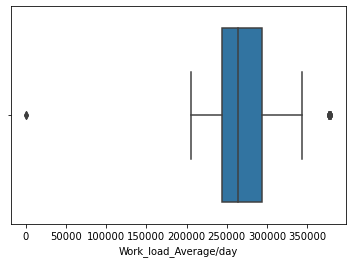

In [38]:
# columns Hit_target and Weight have missing values.
# Let's detect outliers simultaneously
import seaborn as sns
sns.boxplot(x=X['Work_load_Average/day'])

<AxesSubplot:xlabel='Transportation_expense'>

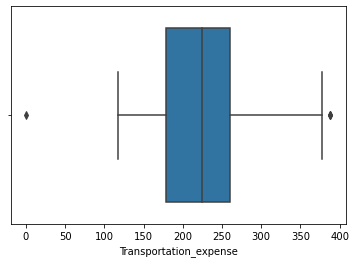

In [39]:
sns.boxplot(x=X['Transportation_expense'])

<AxesSubplot:xlabel='Distance_from_Residence_to_Work'>

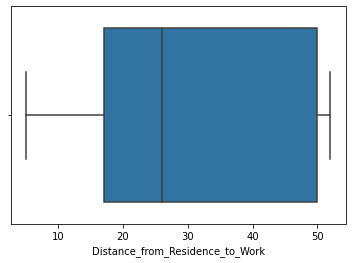

In [40]:
sns.boxplot(x=X['Distance_from_Residence_to_Work'])

<AxesSubplot:xlabel='Age'>

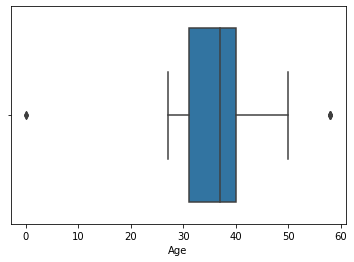

In [41]:
sns.boxplot(x=X['Age'])

<AxesSubplot:xlabel='Hit_target'>

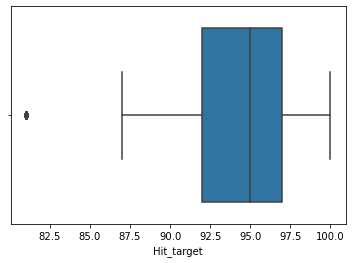

In [42]:
sns.boxplot(x=X['Hit_target'])

<AxesSubplot:xlabel='Weight'>

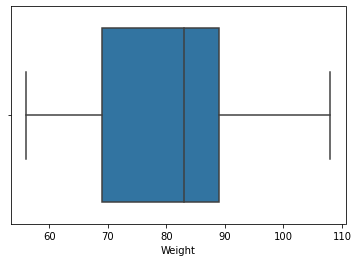

In [43]:
sns.boxplot(x=X['Weight'])

<AxesSubplot:xlabel='Height'>

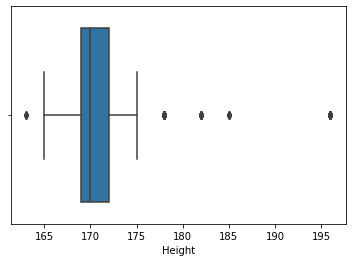

In [44]:
sns.boxplot(x=X['Height'])

<AxesSubplot:xlabel='Body_mass_index'>

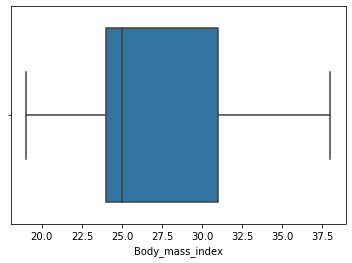

In [45]:
sns.boxplot(x=X['Body_mass_index'])

After studying the boxplots of our continuous variables, we can definitely see that the lower end outliers for Work_load_Average/day, Transportation_expense and Age that lie on 0 are most probably outliers caused due to data collection.

Now, we are going to use 2 techniques on outliers and missing values.

1. Dropping outliers and missing values
2. Imputing outliers and missing values

In [46]:
# Dropping method
# outlier detection (zscore method)
#Internally studentized method (z-score)
import numpy as np
from scipy import stats

def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(X, 'Work_load_Average/day')
print(outlier_z)

[573, 641]


In [47]:
print(X['Work_load_Average/day'][573])
print(X['Work_load_Average/day'][641])

12.0
0.0


In [48]:
outlier_z = z_score_method(X, 'Transportation_expense')
print(outlier_z)

[242]


In [49]:
print(X['Transportation_expense'][242])

0


In [50]:
outlier_z = z_score_method(X, 'Age')
print(outlier_z)

[200, 255, 376, 434, 521, 620, 622, 640]


In [51]:
print(X['Age'][outlier_z])

200     0
255    58
376     0
434    58
521    58
620    58
622    58
640    58
Name: Age, dtype: int32


In [52]:
# Age = 58, should not be dropped. So let's only drop age = 0
# Therefore the outlier row numbers are 573,641,242,200,376

In [53]:
# Missing values
X[X['Hit_target'].isnull()].index.tolist()

[531]

In [54]:
X[X['Weight'].isnull()].index.tolist()

[500, 576]

In [55]:
# however, weight can be manually computed as Height in metres * BMI
X['Weight'][500] = X['Body_mass_index'][500] * ((X['Height'][500]/100)**2)
X['Weight'][576] = X['Body_mass_index'][576] * ((X['Height'][576]/100)**2)

<ipython-input-55-5aeb7815d2e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weight'][500] = X['Body_mass_index'][500] * ((X['Height'][500]/100)**2)
<ipython-input-55-5aeb7815d2e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weight'][576] = X['Body_mass_index'][576] * ((X['Height'][576]/100)**2)


In [56]:
X['Weight'][500]

55.5579

In [57]:
# Therefore, the final rows to be dropped are: 573,641,242,200,376,531
dropping_rows = [573,641,242,200,376,531]
dropping_rows.sort()

In [58]:
dropping_rows

[200, 242, 376, 531, 573, 641]

In [59]:
X_unaltered = X.copy(deep=True)

In [60]:
X_drop = X.drop(dropping_rows)

In [61]:
# dropping equivalent rows in y
y_drop = y.drop(dropping_rows)

In [62]:
y_drop.shape

(660,)

In [63]:
X_drop.shape

(660, 19)

In [64]:
X.shape

(666, 19)

In [65]:
X_unaltered.shape

(666, 19)

Now let's try imputation instead.

Here we choose KNN imputation.
However, since it is scale sensitive, let us first normalize the data.

In [66]:
# Using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X_scaled_array = scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled_array, columns = ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index'])
X_scaled.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.928571,0.545455,0.25,0.0,0.744845,0.659574,0.428571,0.568966,0.632262,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.304124,0.170213,0.607143,0.862069,0.632262,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.809314,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.461340,0.978723,0.607143,0.655172,0.632262,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.637696,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.719072,0.000000,0.464286,0.672414,0.632262,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.237254,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.744845,0.659574,0.428571,0.568966,0.632262,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947


In [67]:
# Using scaled object fit on train to scale test data
X_test_scaled_array = scaler.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled_array, columns = ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index'])
X_test_scaled.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.964286,0.272727,1.00,0.666667,0.461340,0.446809,0.285714,0.517241,0.650035,0.526316,0.0,0.666667,0.00,0.0,0.0,0.00,0.008430,0.242424,0.000000
1,0.678571,0.272727,0.00,0.666667,0.579897,0.446809,0.285714,0.482759,0.650035,0.526316,0.0,0.000000,0.25,0.0,0.0,0.25,0.256323,0.181818,0.263158
2,0.571429,0.272727,0.25,0.666667,0.605670,0.234043,0.250000,0.551724,0.650035,0.526316,0.0,0.666667,0.00,0.0,0.0,0.00,0.370735,0.454545,0.315789
3,0.964286,0.272727,1.00,0.666667,0.461340,0.446809,0.285714,0.517241,0.650035,0.526316,0.0,0.666667,0.00,0.0,0.0,0.00,0.008430,0.242424,0.000000
4,1.000000,0.272727,0.25,0.666667,0.399485,0.148936,0.464286,0.586207,0.650035,0.526316,0.0,0.000000,0.50,1.0,0.0,0.00,0.752108,1.000000,0.315789


In [68]:
# Repeating scaling on X_drop as well
scaler_drop = MinMaxScaler().fit(X_drop)
X_drop_scaled_array = scaler_drop.transform(X_drop)
X_drop_scaled=pd.DataFrame(X_drop_scaled_array, columns = ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index'])
X_drop_scaled.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.928571,0.545455,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.809314,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.637696,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.237254,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947


In [69]:
# Using scaled object fit on train to scale test data
X_test_drop_scaled_array = scaler_drop.transform(X_test)
X_test_drop_scaled=pd.DataFrame(X_test_drop_scaled_array, columns = ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index'])
X_test_drop_scaled.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.964286,0.272727,1.00,0.666667,0.225926,0.446809,0.285714,0.096774,0.233403,0.526316,0.0,0.666667,0.00,0.0,0.0,0.00,0.008430,0.242424,0.000000
1,0.678571,0.272727,0.00,0.666667,0.396296,0.446809,0.285714,0.032258,0.233403,0.526316,0.0,0.000000,0.25,0.0,0.0,0.25,0.256323,0.181818,0.263158
2,0.571429,0.272727,0.25,0.666667,0.433333,0.234043,0.250000,0.161290,0.233403,0.526316,0.0,0.666667,0.00,0.0,0.0,0.00,0.370735,0.454545,0.315789
3,0.964286,0.272727,1.00,0.666667,0.225926,0.446809,0.285714,0.096774,0.233403,0.526316,0.0,0.666667,0.00,0.0,0.0,0.00,0.008430,0.242424,0.000000
4,1.000000,0.272727,0.25,0.666667,0.137037,0.148936,0.464286,0.225806,0.233403,0.526316,0.0,0.000000,0.50,1.0,0.0,0.00,0.752108,1.000000,0.315789


In [70]:
X_test_drop_scaled.shape

(74, 19)

In [71]:
X_test_scaled.shape

(74, 19)

Both X_test_drop_scaled and X_test_scaled should have the same dimensions.
This is because the scaler object has just been fit on different train datasets(one with drops and one without drops), however, no rows can ever be dropped from test.

In [72]:
# Marking missing values and outliers
X_scaled.isna().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         1
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
dtype: int64

In [73]:
# Let's mark outliers as na too.
# For Work_load_Average/day ==> 573, 641
# Transportation_expense ==> 242
# Age ==> 200,376
X_scaled['Work_load_Average/day'][573] = np.NaN
X_scaled['Work_load_Average/day'][641] = np.NaN
X_scaled['Transportation_expense'][242] = np.NaN
X_scaled['Age'][200] = np.NaN
X_scaled['Age'][376] = np.NaN

In [74]:
X_scaled.isna().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             1
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                2
Work_load_Average/day              2
Hit_target                         1
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
dtype: int64

In [75]:
# Now begining KNN imputation on X_scaled
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_imputed_scaled = pd.DataFrame(imputer.fit_transform(X_scaled),columns = X_scaled.columns)

In [76]:
X_imputed_scaled.isna().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
dtype: int64

In [77]:
X_imputed_scaled.head(10)

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.928571,0.545455,0.25,0.0,0.744845,0.659574,0.428571,0.568966,0.632262,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.304124,0.170213,0.607143,0.862069,0.632262,0.842105,1.0,0.000000,0.25,1.0,0.0,0.000,0.809314,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.461340,0.978723,0.607143,0.655172,0.632262,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.637696,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.719072,0.000000,0.464286,0.672414,0.632262,0.842105,0.0,0.000000,0.50,1.0,1.0,0.000,0.237254,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.744845,0.659574,0.428571,0.568966,0.632262,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947
5,0.821429,0.545455,1.00,0.0,0.461340,0.978723,0.607143,0.655172,0.632262,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.637696,0.212121,0.631579
6,0.785714,0.545455,1.00,0.0,0.930412,1.000000,0.071429,0.482759,0.632262,0.842105,0.0,0.000000,0.25,1.0,0.0,0.500,0.466078,0.272727,0.421053
7,0.821429,0.545455,1.00,0.0,0.670103,0.957447,0.357143,0.620690,0.632262,0.842105,0.0,0.000000,1.00,1.0,0.0,0.000,0.180048,0.151515,0.210526
8,0.678571,0.545455,0.00,0.0,0.399485,0.148936,0.464286,0.586207,0.632262,0.842105,0.0,0.000000,0.50,1.0,0.0,0.000,0.752108,1.000000,0.315789
9,0.785714,0.545455,0.00,0.0,0.605670,0.127660,0.464286,0.637931,0.632262,0.842105,0.0,0.666667,0.25,0.0,0.0,0.125,0.618627,0.272727,0.526316


In [78]:
# Using scaled object fit on train to scale test data
scaler_imputed_scaled = MinMaxScaler().fit(X_imputed_scaled)
X_test_imputed_scaled_array = scaler_imputed_scaled.transform(X_test)
X_test_imputed_scaled=pd.DataFrame(X_test_imputed_scaled_array, columns = ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index'])
X_test_imputed_scaled.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,27.0,4.0,6.0,3.0,256.792593,26.0,9.0,55.258065,539492.369498,91.0,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,19.0
1,19.0,4.0,2.0,3.0,322.896296,26.0,9.0,51.516129,539492.369498,91.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0
2,16.0,4.0,3.0,3.0,337.266667,16.0,8.0,59.000000,539492.369498,91.0,0.0,3.0,0.0,0.0,0.0,0.0,75.0,178.0,25.0
3,27.0,4.0,6.0,3.0,256.792593,26.0,9.0,55.258065,539492.369498,91.0,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,19.0
4,28.0,4.0,3.0,3.0,222.303704,12.0,14.0,62.741935,539492.369498,91.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0


In [79]:
X_test_imputed_scaled.shape

(74, 19)

Now conducting PCA, LDA and Factor Analysis

In [80]:
# Conducting basic PCA with 2 components. This is just to get an idea of the explained variance
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_imputed_scaled)

PCA(n_components=2)

In [81]:
print(pca.components_)

[[-0.06971124 -0.0321277  -0.0558865   0.05307394 -0.04001335 -0.33867925
  -0.12128228 -0.04847128  0.01591005  0.04018698 -0.01630996  0.19494314
  -0.08711664 -0.85363892  0.07363091  0.04007896 -0.19568682 -0.01699344
  -0.18102163]
 [-0.24679841  0.55997026  0.01691818  0.73330665  0.06828336 -0.06566499
  -0.02709108  0.00554025  0.01557802 -0.1690623   0.18122013 -0.03324906
   0.10712139  0.03700709 -0.02642027  0.03069614  0.00191655 -0.0193112
   0.01129122]]


In [82]:
print(pca.explained_variance_)

[0.31229424 0.19644843]


 Only 50% of the variance explained with 2 components. Not enough!

In [83]:
projected = pca.fit_transform(X_imputed_scaled)
print(X_imputed_scaled.shape)
print(projected.shape)

(666, 19)
(666, 2)


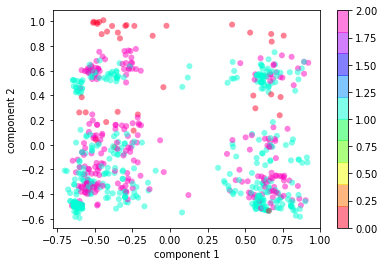

In [84]:
import matplotlib.pyplot as plt
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

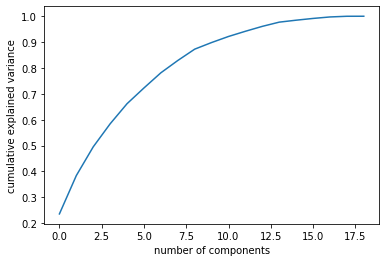

In [85]:
# Now, lets try and find optimal number of features
pca = PCA().fit(X_imputed_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [86]:
# We can visually see that for the X_imputed_scaled number of components between 10-15 would account for 90-95% variability
# We can directly set a threshold of 90% and run the PCA
pca = PCA(.90)
projected_X_imputed_scaled = pca.fit_transform(X_imputed_scaled)

In [87]:
# The pca chose 11 principal components to explain 90% variablility
projected_X_imputed_scaled

array([[-0.540133  , -0.3941772 , -0.14132815, ..., -0.20070863,
         0.129689  ,  0.1161406 ],
       [-0.36990421, -0.01820522, -0.78887244, ..., -0.13611232,
        -0.16431204, -0.00432461],
       [-0.63543422, -0.46384732, -0.10176732, ...,  0.10936506,
        -0.01747939,  0.15728696],
       ...,
       [-0.47344813,  0.00417234,  0.07739378, ..., -0.14301361,
         0.43240371, -0.25678743],
       [ 0.66947088,  0.05456445, -0.30392022, ..., -0.06064931,
        -0.10584554, -0.18323357],
       [ 0.66006098, -0.01820262,  0.21774023, ..., -0.12519266,
         0.01820805,  0.19844773]])

In [88]:
print(pca.components_)

[[-6.97118796e-02 -3.21273222e-02 -5.58864512e-02  5.30738193e-02
  -4.00136438e-02 -3.38679068e-01 -1.21282071e-01 -4.84712119e-02
   1.59100017e-02  4.01876053e-02 -1.63107924e-02  1.94942857e-01
  -8.71165140e-02 -8.53639022e-01  7.36308957e-02  4.00788324e-02
  -1.95686786e-01 -1.69932555e-02 -1.81021690e-01]
 [-2.46808579e-01  5.59976258e-01  1.69189617e-02  7.33304778e-01
   6.82800201e-02 -6.56631347e-02 -2.70878774e-02  5.54171294e-03
   1.55769046e-02 -1.69051842e-01  1.81206572e-01 -3.32531059e-02
   1.07122772e-01  3.70060075e-02 -2.64204638e-02  3.06943479e-02
   1.91676982e-03 -1.93097795e-02  1.12907014e-02]
 [ 1.71888712e-01  2.20750379e-04  7.26222633e-01  4.16677174e-02
   1.39322502e-01  2.75355131e-01 -9.02400131e-02 -7.48083445e-02
   2.84318721e-03  4.25994807e-02 -7.88877709e-02  3.12588917e-02
   2.85800449e-01 -2.08253439e-02  7.57354278e-02  5.85509162e-02
  -3.67814589e-01 -1.39363219e-01 -2.78092469e-01]
 [-5.46106616e-01 -1.00936577e-01 -2.50636084e-01 -2.60

In [89]:
print(pca.explained_variance_)

[0.31229424 0.19644843 0.14710316 0.11791854 0.10302091 0.08060344
 0.07767007 0.06295414 0.05805933 0.03392613 0.03103938]


In [90]:
X_imputed_scaled_PCA = pd.DataFrame(projected_X_imputed_scaled)

In [91]:
X_imputed_scaled_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.540133,-0.394177,-0.141328,0.116005,-0.208403,-0.211090,0.232813,0.174835,-0.200709,0.129689,0.116141
1,-0.369904,-0.018205,-0.788872,0.699114,0.839406,0.149141,0.208668,-0.016724,-0.136112,-0.164312,-0.004325
2,-0.635434,-0.463847,-0.101767,-0.199386,-0.004128,0.247642,0.303218,-0.020250,0.109365,-0.017479,0.157287
3,-0.095764,-0.209371,0.236404,0.865528,0.467711,-0.473183,0.223446,0.085676,0.599199,0.057542,0.062752
4,-0.560607,-0.359274,0.203367,0.049198,0.139470,-0.156826,0.278598,0.150188,-0.212817,0.180648,0.130948


In [92]:
# Creating an equivalent test dataset
# Using the same pca object that was fit on train data
projected_X_test_imputed_scaled = pca.transform(X_test)

In [93]:
X_test_imputed_scaled_PCA = pd.DataFrame(projected_X_test_imputed_scaled)

In [94]:
X_test_imputed_scaled_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3885.655162,3825.817743,692.253249,6919.599009,9183.643877,789.019156,-31248.700530,-4244.915807,578.707729,1584.725208,-32830.486233
1,3880.880823,3831.209342,688.978759,6929.732391,9181.683739,794.806715,-31245.257721,-4233.254432,566.537025,1605.948296,-32829.581005
2,3882.836887,3832.969358,683.540363,6931.991217,9189.955512,787.767956,-31245.548448,-4235.228097,563.503944,1613.714245,-32828.461883
3,3885.655162,3825.817743,692.253249,6919.599009,9183.643877,789.019156,-31248.700530,-4244.915807,578.707729,1584.725208,-32830.486233
4,3880.094145,3824.664980,663.288178,6906.867014,9207.213348,769.446882,-31252.018736,-4239.543438,579.067087,1594.298179,-32824.099387


In [95]:
X_test_imputed_scaled_PCA.shape

(74, 11)

In [96]:
X_test_imputed_scaled_PCA.shape
# 11 features like X_imputed_scaled_PCA, but all 74 rows of test included

(74, 11)

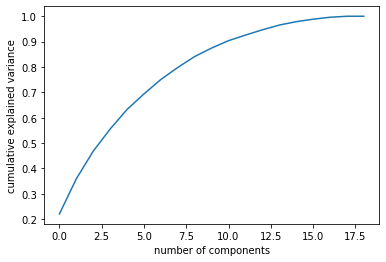

In [97]:
# Let's repeat the same process for X_drop_scaled
pca = PCA().fit(X_drop_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [98]:
# Looks like 8-10 PCs might be enough for this version of the dataset
pca = PCA(.90)
projected_X_drop_scaled = pca.fit_transform(X_drop_scaled)

In [99]:
projected_X_drop_scaled.shape

(660, 11)

In [100]:
X_drop_scaled_PCA = pd.DataFrame(projected_X_drop_scaled)

In [101]:
X_drop_scaled_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.539586,-0.397286,0.007008,0.231569,-0.278192,0.277411,-0.185006,0.128805,-0.247302,-0.061889,0.138077
1,-0.393303,-0.086279,-0.865063,0.573007,0.844044,0.444406,0.189326,-0.089478,-0.034150,-0.399232,-0.196381
2,-0.626906,-0.505571,-0.116275,-0.190081,-0.117106,0.299830,0.267261,-0.058570,0.136661,-0.060543,-0.022580
3,-0.125748,-0.175351,0.278934,0.636541,0.661404,0.456705,-0.506745,-0.072638,0.513022,-0.069404,0.326561
4,-0.561378,-0.348409,0.276398,0.026242,0.063725,0.358923,-0.107352,0.082238,-0.287289,-0.059811,0.180964


In [102]:
# Creating an equivalent test dataset
# Using the same pca object that was fit on train data
projected_X_test_drop_scaled = pca.transform(X_test)

In [103]:
X_test_drop_scaled_PCA = pd.DataFrame(projected_X_test_drop_scaled)

In [104]:
X_drop_scaled_PCA.shape

(660, 11)

In [105]:
X_test_drop_scaled_PCA.shape

(74, 11)

Proceeding to corrrelation method for feature elimination

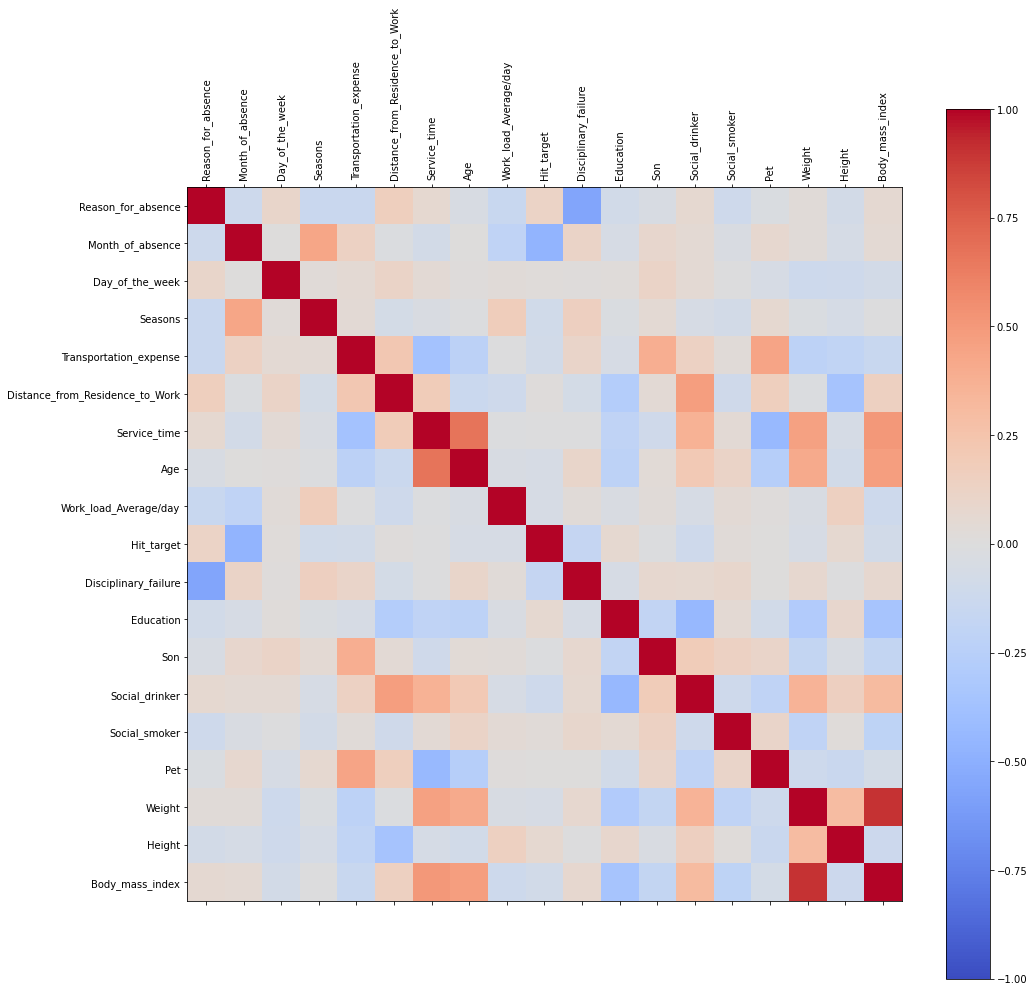

In [106]:
# Let's proceed to feature selection
corr = X_imputed_scaled.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
fig.set_size_inches([16,16])
ticks = np.arange(0,len(X_imputed_scaled.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_imputed_scaled.columns)
ax.set_yticklabels(X_imputed_scaled.columns)
plt.show()

In [107]:
corr_matrix =X_imputed_scaled.corr().abs()

In [108]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [109]:
# Find index of feature columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [110]:
to_drop

['Age', 'Body_mass_index']

In [111]:
X_imputed_scaled_correl = X_imputed_scaled.drop(to_drop, axis=1)

In [112]:
# creating a test equivalent
# Using the same to_drop columns as train
to_drop

['Age', 'Body_mass_index']

In [113]:
X_test_imputed_scaled_correl = X_test_imputed_scaled.drop(to_drop, axis=1)

In [114]:
X_test_imputed_scaled_correl.shape

(74, 17)

In [115]:
X_imputed_scaled_correl.shape

(666, 17)

In [116]:
X_test_imputed_scaled.shape

(74, 19)

In [117]:
X_imputed_scaled.shape

(666, 19)

In [118]:
# repeat for dropped version
corr_matrix =X_drop_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop

['Age', 'Body_mass_index']

In [119]:
X_drop_scaled_correl = X_drop_scaled.drop(to_drop, axis=1)

In [120]:
# creating a test equivalent
# Using the same to_drop columns as train
to_drop

['Age', 'Body_mass_index']

In [121]:
X_test_drop_scaled_correl = X_test_drop_scaled.drop(to_drop, axis=1)

In [122]:
X_test_drop_scaled_correl.shape

(74, 17)

In [123]:
X_drop_scaled_correl.shape

(660, 17)

Proceeding to LDA

In [124]:
# Proceeding to LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X_imputed_scaled, y)

In [125]:
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([0.98527316, 0.01472684])

In [126]:
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [127]:
lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(X_imputed_scaled, y)

In [128]:
lda_var_ratios = lda.explained_variance_ratio_

In [129]:
select_n_components(lda_var_ratios, 0.95)

1

In [130]:
# 1 component alone can explain 95% variance. However, lets stick to 2.
lda = LinearDiscriminantAnalysis(n_components=2)
X_imputed_scaled_LDA_array = lda.fit_transform(X_imputed_scaled, y)

In [131]:
lda.explained_variance_ratio_

array([0.98527316, 0.01472684])

In [132]:
X_imputed_scaled_LDA = pd.DataFrame(X_imputed_scaled_LDA_array)

In [133]:
X_drop_scaled_LDA_array = lda.fit_transform(X_drop_scaled, y_drop)

In [134]:
lda.explained_variance_ratio_

array([0.98532613, 0.01467387])

In [135]:
X_drop_scaled_LDA = pd.DataFrame(X_drop_scaled_LDA_array)

In [136]:
X_imputed_scaled_LDA.shape

(666, 2)

In [137]:
X_drop_scaled_LDA.shape

(660, 2)

In [138]:
# creating the equivalent test LDA datasets
X_test_imputed_scaled_LDA_array = lda.fit_transform(X_test_imputed_scaled, y_test)

In [139]:
lda.explained_variance_ratio_

array([0.97925365, 0.02074635])

In [140]:
X_test_imputed_scaled_LDA = pd.DataFrame(X_test_imputed_scaled_LDA_array)

In [141]:
X_test_drop_scaled_LDA_array = lda.fit_transform(X_test_drop_scaled, y_test)

In [142]:
lda.explained_variance_ratio_

array([0.97925365, 0.02074635])

In [143]:
X_test_drop_scaled_LDA = pd.DataFrame(X_test_drop_scaled_LDA_array)

# Printing shapes to verify datasets and writing to csv

In [144]:
print(X.shape)
print(X_test.shape)
print("==================")
print(X_drop.shape)
print("==================")
print(X_scaled.shape)
print(X_test_scaled.shape)
print("==================")
print(X_drop_scaled.shape)
print(X_test_drop_scaled.shape)
print("==================")
print(X_imputed_scaled.shape)
print(X_test_imputed_scaled.shape)
print("==================")
print(X_imputed_scaled_PCA.shape)
print(X_test_imputed_scaled_PCA.shape)
print("==================")
print(X_drop_scaled_PCA.shape)
print(X_test_drop_scaled_PCA.shape)
print("==================")
print(X_imputed_scaled_correl.shape)
print(X_test_imputed_scaled_correl.shape)
print("==================")
print(X_drop_scaled_correl.shape)
print(X_test_drop_scaled_correl.shape)
print("==================")
print(X_imputed_scaled_LDA.shape)
print(X_test_imputed_scaled_LDA.shape)
print("==================")
print(X_drop_scaled_LDA.shape)
print(X_test_drop_scaled_LDA.shape)
print("==================")
print(y.shape)
print(y_drop.shape)
print(y_test.shape)

(666, 19)
(74, 19)
(660, 19)
(666, 19)
(74, 19)
(660, 19)
(74, 19)
(666, 19)
(74, 19)
(666, 11)
(74, 11)
(660, 11)
(74, 11)
(666, 17)
(74, 17)
(660, 17)
(74, 17)
(666, 2)
(74, 2)
(660, 2)
(74, 2)
(666,)
(660,)
(74,)


In [145]:
X.to_csv('X.csv', index=False, header=True)
X_test.to_csv('X_test.csv', index=False, header=True)
X_drop.to_csv('X_drop.csv', index=False, header=True)
X_scaled.to_csv('X_scaled.csv', index=False, header=True)
X_test_scaled.to_csv('X_test_scaled.csv', index=False, header=True)
X_drop_scaled.to_csv('X_drop_scaled.csv', index=False, header=True)
X_test_drop_scaled.to_csv('X_test_drop_scaled.csv', index=False, header=True)
X_imputed_scaled.to_csv('X_imputed_scaled.csv', index=False, header=True)
X_test_imputed_scaled.to_csv('X_test_imputed_scaled.csv', index=False, header=True)
X_imputed_scaled_PCA.to_csv('X_imputed_scaled_PCA.csv', index=False, header=True)
X_test_imputed_scaled_PCA.to_csv('X_test_imputed_scaled_PCA.csv', index=False, header=True)
X_drop_scaled_PCA.to_csv('X_drop_scaled_PCA.csv', index=False, header=True)
X_test_drop_scaled_PCA.to_csv('X_test_drop_scaled_PCA.csv', index=False, header=True)
X_imputed_scaled_correl.to_csv('X_imputed_scaled_correl.csv', index=False, header=True)
X_test_imputed_scaled_correl.to_csv('X_test_imputed_scaled_correl.csv', index=False, header=True)
X_drop_scaled_correl.to_csv('X_drop_scaled_correl.csv', index=False, header=True)
X_test_drop_scaled_correl.to_csv('X_test_drop_scaled_correl.csv', index=False, header=True)
X_imputed_scaled_LDA.to_csv('X_imputed_scaled_LDA.csv', index=False, header=True)
X_test_imputed_scaled_LDA.to_csv('X_test_imputed_scaled_LDA.csv', index=False, header=True)
X_drop_scaled_LDA.to_csv('X_drop_scaled_LDA.csv', index=False, header=True)
X_test_drop_scaled_LDA.to_csv('X_test_drop_scaled_LDA.csv', index=False, header=True)
y.to_csv('y.csv', index=False, header=True)
y_drop.to_csv('y_drop.csv', index=False, header=True)
y_test.to_csv('y_test.csv', index=False, header=True)